In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import nxviz as nv
from nxviz import MatrixPlot, ArcPlot, CircosPlot
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [24]:
G = nx.read_graphml("graphml/bipartite_network_all_disease_gene.graphml")
genes = pd.read_csv('../raw_data/gene_associations.tsv', sep='\t')

In [21]:
list(G.nodes(data=True))[0]

('C0019209',
 {'bipartite': 'disease',
  'betweenness_centrality': 0.0014591892437047244,
  'degree': 43,
  'degree_centrality': 0.0021796431467964316})

In [22]:
node_genes = [n for n, d in G.nodes(data=True) if d['bipartite']=='gene']
node_genes_dict = []
for n in node_genes:
    d = G.nodes(data=True)[n]
    d['geneId'] = n
    node_genes_dict.append(d)

In [23]:
node_genes_df = pd.DataFrame(node_genes_dict)
node_genes_df.head()

,bipartite,betweenness_centrality,degree,degree_centrality,geneId
0,gene,0.000016,2,0.000101,1
1,gene,0.000244,26,0.001318,2
2,gene,0.000081,14,0.000710,9
3,gene,0.000474,37,0.001876,10
4,gene,0.000021,5,0.000253,12


In [29]:
node_genes_df['geneId'] = node_genes_df['geneId'].astype('int64')

In [34]:
genes_df = node_genes_df.merge(genes, on='geneId', how='inner')
genes_df.head()

,bipartite,betweenness_centrality,degree,degree_centrality,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids
0,gene,0.000016,2,0.000101,1,A1BG,0.700,0.538,4.991700e-09,Receptor,DTO_05007575,27,20
1,gene,0.000244,26,0.001318,2,A2M,0.529,0.769,4.522900e-11,Enzyme modulator,DTO_05007584,147,145
2,gene,0.000081,14,0.000710,9,NAT1,0.536,0.846,1.929400e-14,Enzyme,DTO_05007624,133,184
3,gene,0.000474,37,0.001876,10,NAT2,0.451,0.885,3.274400e-06,Enzyme,DTO_05007624,311,627
4,gene,0.000021,5,0.000253,12,SERPINA3,0.486,0.846,8.833000e-14,Enzyme modulator,DTO_05007584,229,300


<Axes: xlabel='degree', ylabel='betweenness_centrality'>

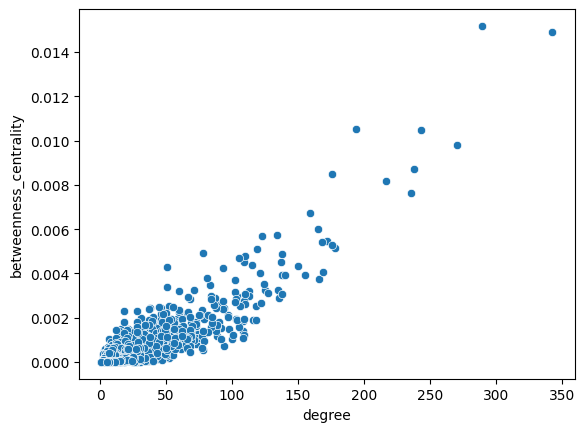

In [56]:
sns.scatterplot(data=genes_df, x='degree', y='betweenness_centrality')


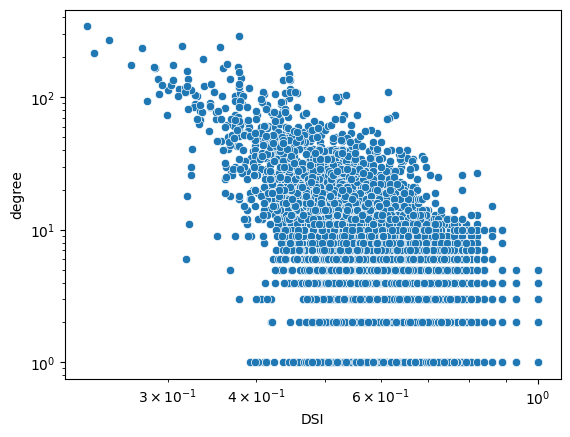

In [58]:
sns.scatterplot(data=genes_df, x='DSI', y='degree')
plt.xscale('log')
plt.yscale('log')

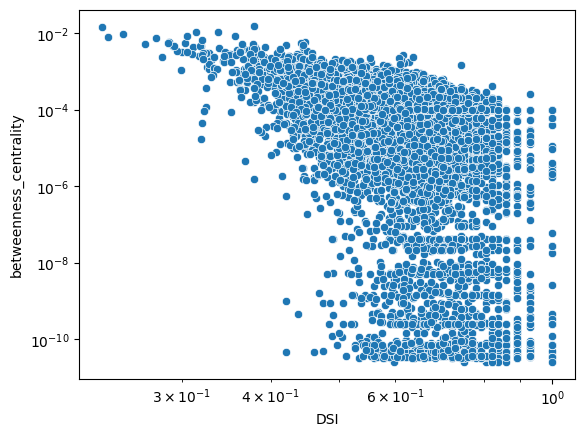

In [61]:
sns.scatterplot(data=genes_df, x='DSI', y='betweenness_centrality')
plt.xscale('log')
plt.yscale('log')

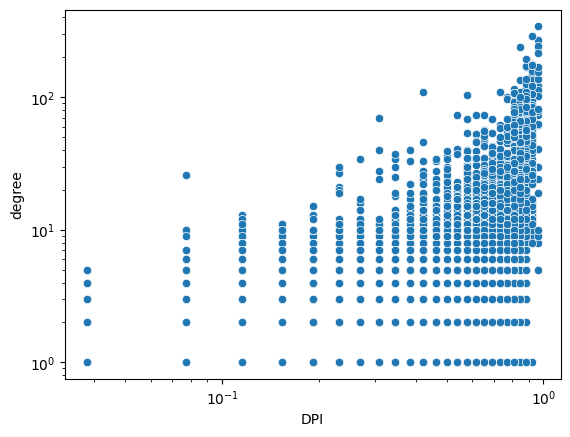

In [62]:
sns.scatterplot(data=genes_df, x='DPI', y='degree')
plt.xscale('log')
plt.yscale('log')

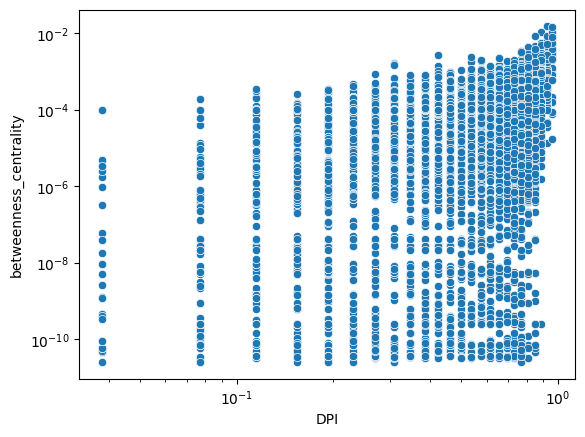

In [63]:
sns.scatterplot(data=genes_df, x='DPI', y='betweenness_centrality')
plt.xscale('log')
plt.yscale('log')

In [64]:
genes_df['lof_tolerance'] = genes_df['PLI'].apply(
    lambda x: 'Extreme Intolerant' if x >= 0.9 else 
    ('Intolerant' if x <= 0.1 else 'Tolerant')
)

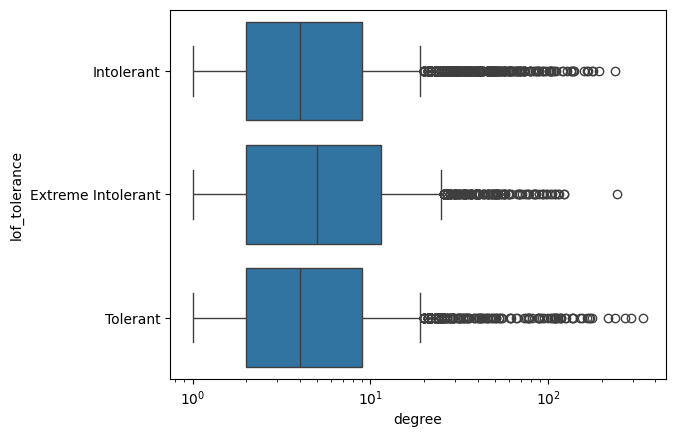

In [65]:
sns.boxplot(data=genes_df, x='degree', y='lof_tolerance')
plt.xscale('log')

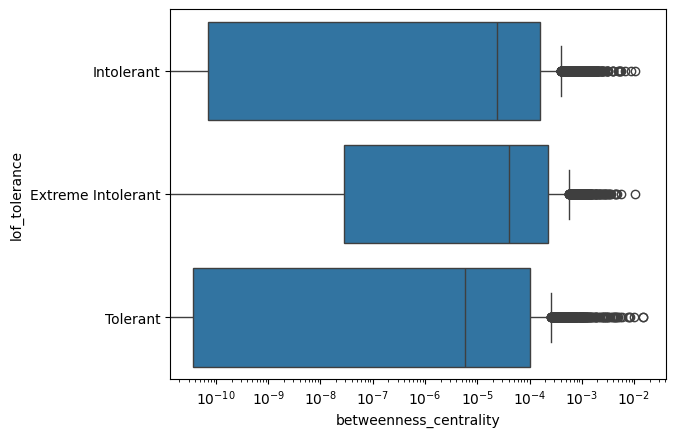

In [66]:
sns.boxplot(data=genes_df, x='betweenness_centrality', y='lof_tolerance')
plt.xscale('log')